In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 5)

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
data.info

<bound method DataFrame.info of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [8]:
data['SL'].fillna(data['SL'].median(), inplace = True)
data['SW'].fillna(data['SW'].median(), inplace = True)
data['PL'].fillna(data['PL'].median(), inplace = True)

In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [10]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [11]:
data.nunique()

SL                35
SW                23
PL                44
PW                22
Classification     3
dtype: int64

In [14]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [23]:
X = data.drop('Classification',axis=1)
y = pd.DataFrame(data['Classification'])

In [24]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    y[a[i]] = label_en.fit_transform(y[a[i]])

In [29]:
y

,Classification
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [32]:
X_train.shape

(120, 4)

In [33]:
y_train.shape

(120, 1)

In [34]:
X_test.shape

(30, 4)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix

# Logistic Regression

In [38]:
import warnings
warnings.filterwarnings('ignore')
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_lr = model.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred_lr)

1.0

In [40]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# KNN

In [41]:
neighbors = np.arange(3,15)
acc_vals = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_vals.append(acc)

Text(0, 0.5, 'accuracy')

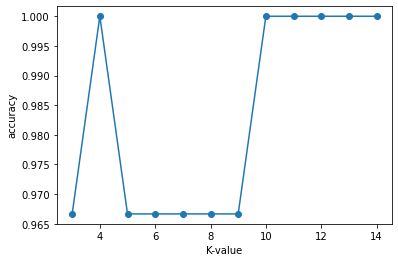

In [42]:
plt.plot(neighbors,acc_vals,'o-')
plt.xlabel('K-value')
plt.ylabel('accuracy')

In [43]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)
y_pred_k = model.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred_k)

1.0

In [45]:
confusion_matrix(y_test,y_pred_k)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# SVC

In [46]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred_s = model.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred_s)

1.0

In [48]:
confusion_matrix(y_test,y_pred_s)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [49]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred_d = model.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred_d)

1.0

In [51]:
confusion_matrix(y_test,y_pred_d)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred = rf.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred)

1.0

In [56]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [57]:
pd.Series(rf.feature_importances_,index =X.columns).sort_values(ascending=False)*100

PW    51.871912
PL    34.766591
SL     9.322853
SW     4.038643
dtype: float64

## All of the models are equally effective